In [24]:
# gzip is a pacakge for opening/making gz files
import gzip
# import plt for plotting
import matplotlib.pyplot as plt
# import numpy for Array creation/manipulation
import numpy as np
# import os for working with local files
import os
# pandas is a package for creating / editing data frames
import pandas as pd
# seaborn is a statistical plotting package
import seaborn as sns

# generate plots in the jupyter notebook
%matplotlib inline

# set the size of the figures 
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(23.4,16.54)})
# set the backgrounds of figures to white with a grid
sns.set_style("whitegrid")

In [2]:
# Path to folder containing the raw data
DATA_DIR = '../data/'
# File name of the raw data
DATA_FILENAME = 'esetSC2.csv'
# Load the data into a dataframe
df1 = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep=',',
    
)

In [3]:
# Path to folder containing the raw data
DATA_DIR = '../data/'
# File name of the raw data
DATA_FILENAME = 'anoSC2_v20_filtered.csv'
# Load the data into a dataframe
df3 = pd.read_csv(
    # This creates the full path to the file
    '{}{}'.format(DATA_DIR, DATA_FILENAME)
    # Ignore lines that start with '!'
    , comment='\t',
    # the character used to separate values
    sep=',',
    
)


In [4]:
f = ['Unnamed: 0']
for sample in list(df3['SampleID']):
    f.append(sample)
df3 = df3.set_index("SampleID")

In [5]:
df = df1[f].set_index('Unnamed: 0')

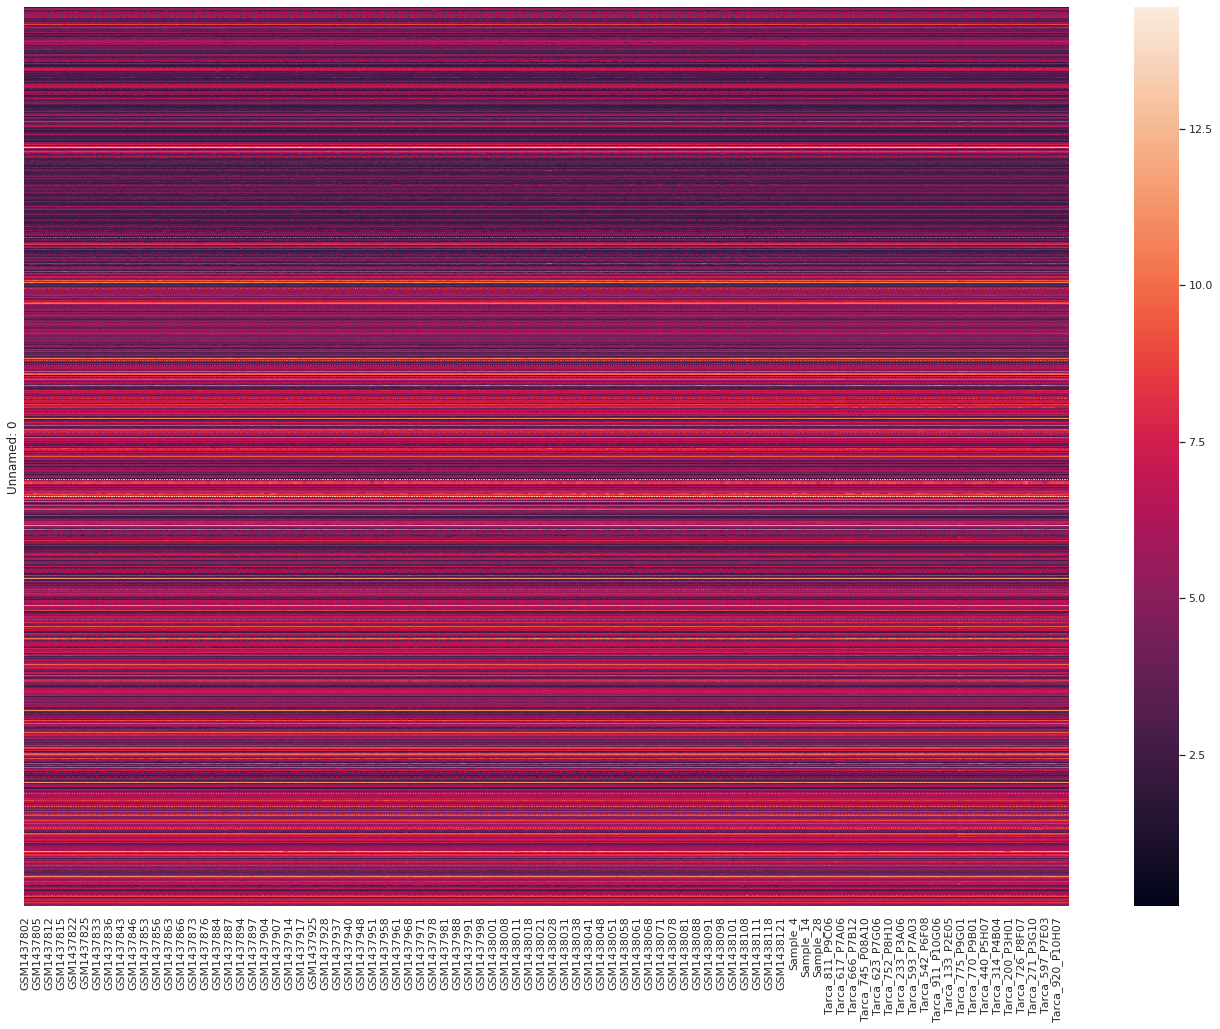

In [64]:
sns.heatmap(data=df, yticklabels=False)

In [38]:
temp_df = df.copy(deep=True)
# add two new columns containing the mean and std for each row respectively
#df[['mean', 'std']] = df.agg(
#    ['mean', 'std'], axis=1
#)

In [39]:
control_samples = []
sPTD_samples = []
PPROM_samples = []
for index, row in df3.iterrows():
    if row['Group'] == 'Control':
        control_samples.append(index)
    elif row['Group'] == 'sPTD':
        sPTD_samples.append(index)
    else:
        PPROM_samples.append(index)

ptb_samples = PPROM_samples + sPTD_samples

# Control vs. sPTD

In [17]:
# add two new columns containing the mean and std for each row respectively
temp_df = temp_df[control_samples + sPTD_samples]

temp_df[['control_mean', 'control_std']] = temp_df[control_samples].agg(
    ['mean', 'std'], axis=1
)
# The same as above but for carcinoma samples
temp_df[['test_mean', 'test_std']] = temp_df[sPTD_samples].agg(
    ['mean', 'std'], axis=1
)

In [18]:
# calculate welch's t test using the mean's and std's
#            m_1 - m_2
# t =    __________________
#          ________________
#         |std_1     std_2
#         |-----  +  ----
#       \/ num_1     num2
def welch_t_test(row):
    return (
        (row['control_mean'] - row['test_mean']) / 
        np.sqrt(
            row['control_std']/len(control_samples) + row['test_std']/len(sPTD_samples)
        )
    )

In [19]:
# create a column called similarity containing the results of the t test
temp_df['similarity'] = temp_df[['control_mean', 'control_std', 'test_mean', 'test_std']].apply(welch_t_test, axis=1)
# sort the data using the similarity
# . once sorted we dont need any of the values used to calculate the similarity
# . This returns a dataframe containing only expression values
df_sorted = temp_df.sort_values('similarity').drop(columns=['control_mean', 'control_std', 'test_mean', 'test_std', 'similarity'])

In [34]:
# Create a new dataframe containing the top 25 and bottom 25 genes by similarity
df_features = df_sorted.head(2).append(df_sorted.tail(2))

df_features = pd.concat([df_features[control_samples],df_features[sPTD_samples]],axis =1)
df_features.shape

(4, 340)

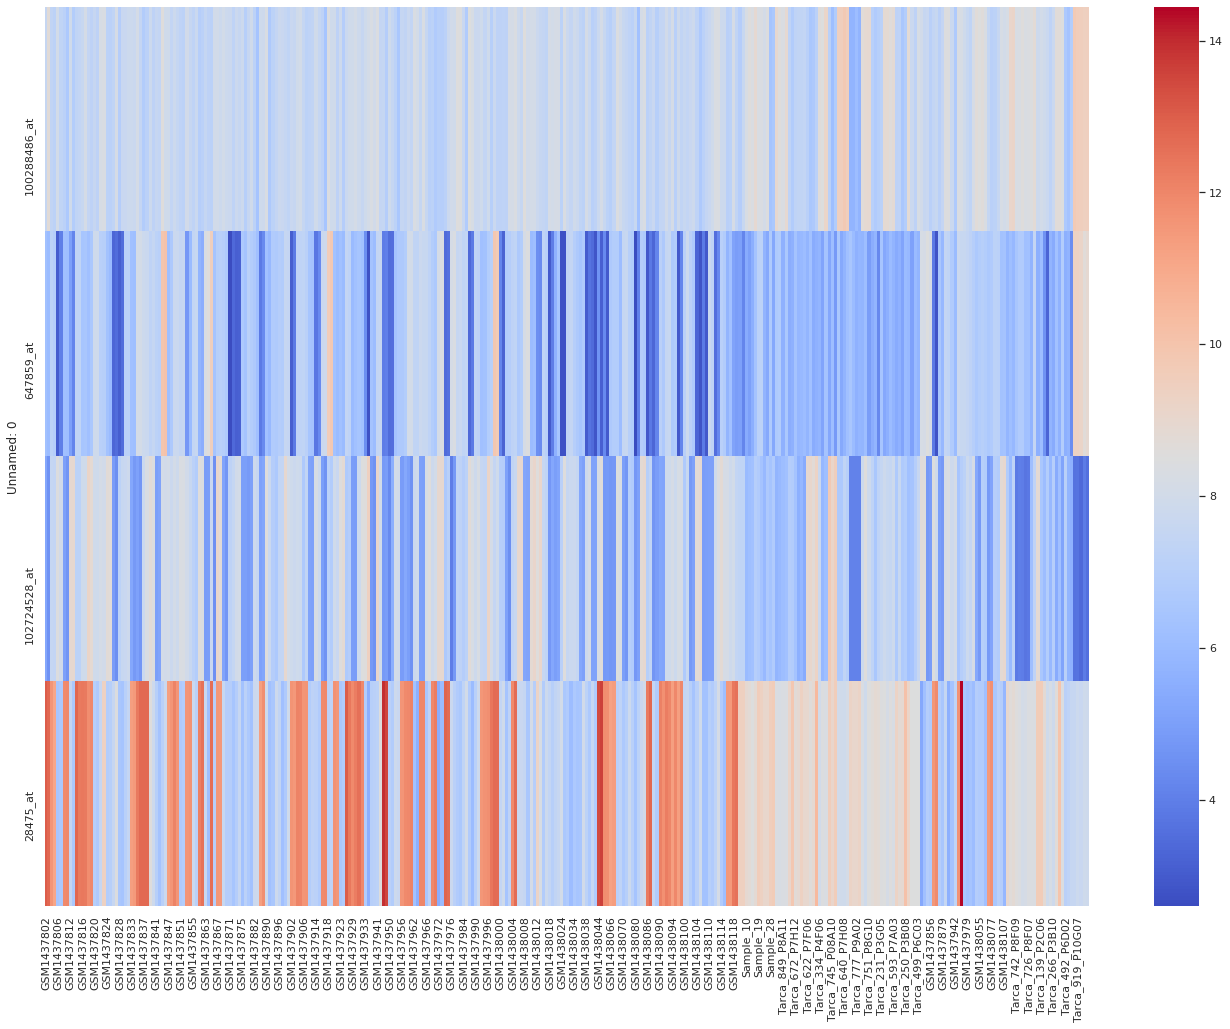

In [35]:
# when viewing this heatmap we see that the genes differentiate the data well
sns.heatmap(data=df_features, cmap='coolwarm')

# Control vs PPROM

In [40]:
# add two new columns containing the mean and std for each row respectively
temp_df = temp_df[control_samples + PPROM_samples]

temp_df[['control_mean', 'control_std']] = temp_df[control_samples].agg(
    ['mean', 'std'], axis=1
)
# The same as above but for carcinoma samples
temp_df[['test_mean', 'test_std']] = temp_df[PPROM_samples].agg(
    ['mean', 'std'], axis=1
)


In [41]:
# calculate welch's t test using the mean's and std's
#            m_1 - m_2
# t =    __________________
#          ________________
#         |std_1     std_2
#         |-----  +  ----
#       \/ num_1     num2
def welch_t_test(row):
    return (
        (row['control_mean'] - row['test_mean']) / 
        np.sqrt(
            row['control_std']/len(control_samples) + row['test_std']/len(PPROM_samples)
        )
    )

In [42]:
# create a column called similarity containing the results of the t test
temp_df['similarity'] = temp_df[['control_mean', 'control_std', 'test_mean', 'test_std']].apply(welch_t_test, axis=1)
# sort the data using the similarity
# . once sorted we dont need any of the values used to calculate the similarity
# . This returns a dataframe containing only expression values
df_sorted = temp_df.sort_values('similarity').drop(columns=['control_mean', 'control_std', 'test_mean', 'test_std', 'similarity'])

In [45]:
# Create a new dataframe containing the top 25 and bottom 25 genes by similarity
df_features = df_sorted.head(10).append(df_sorted.tail(10))

df_features = pd.concat([df_features[control_samples],df_features[PPROM_samples]],axis =1)
df_features.shape

(20, 380)

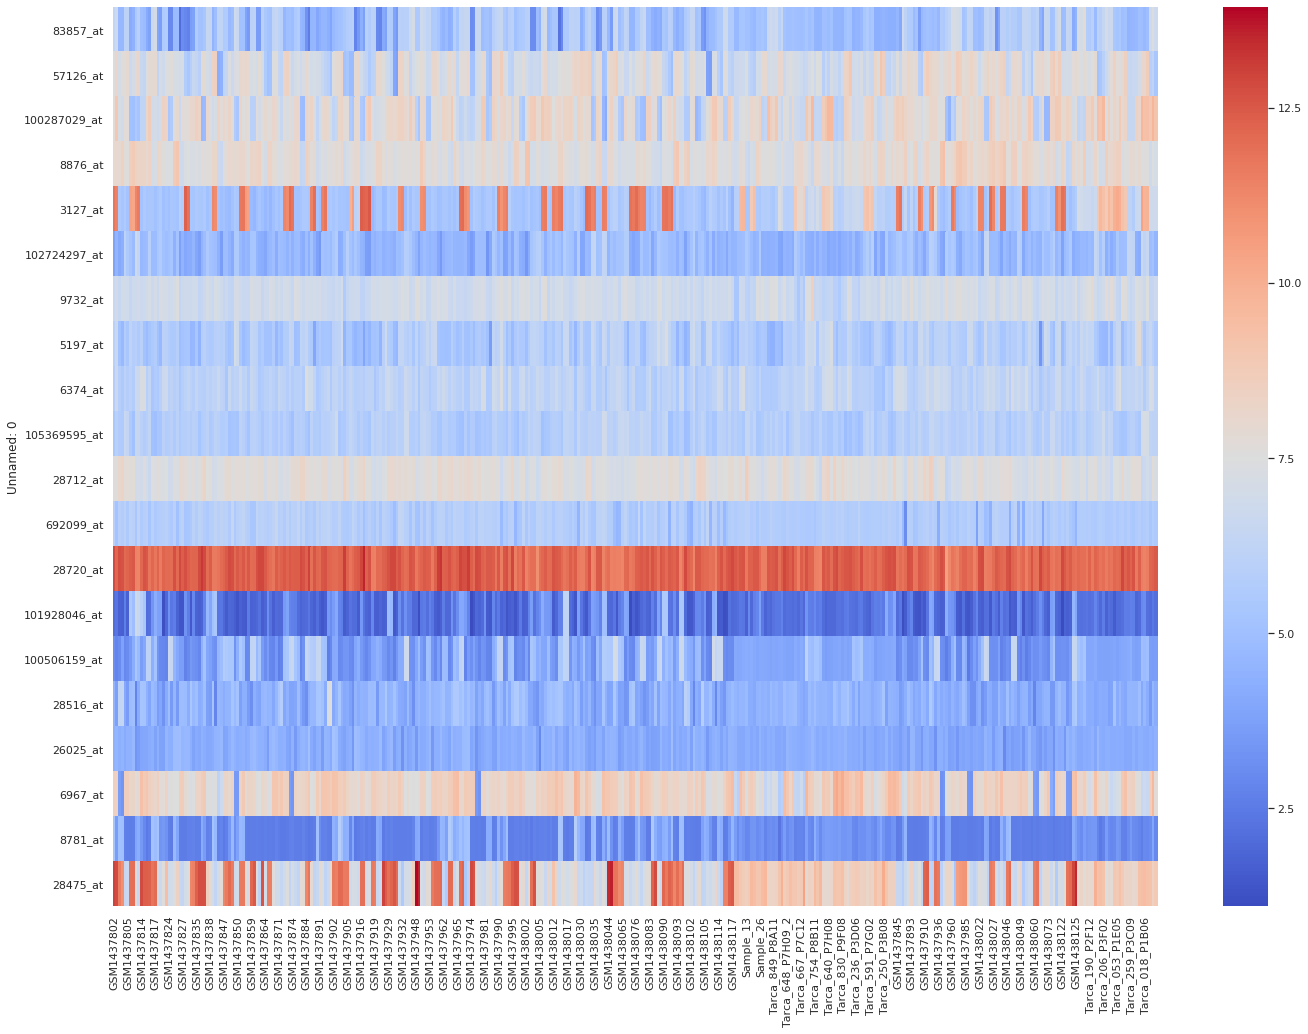

In [46]:
# when viewing this heatmap we see that the genes differentiate the data well
sns.heatmap(data=df_features, cmap='coolwarm')

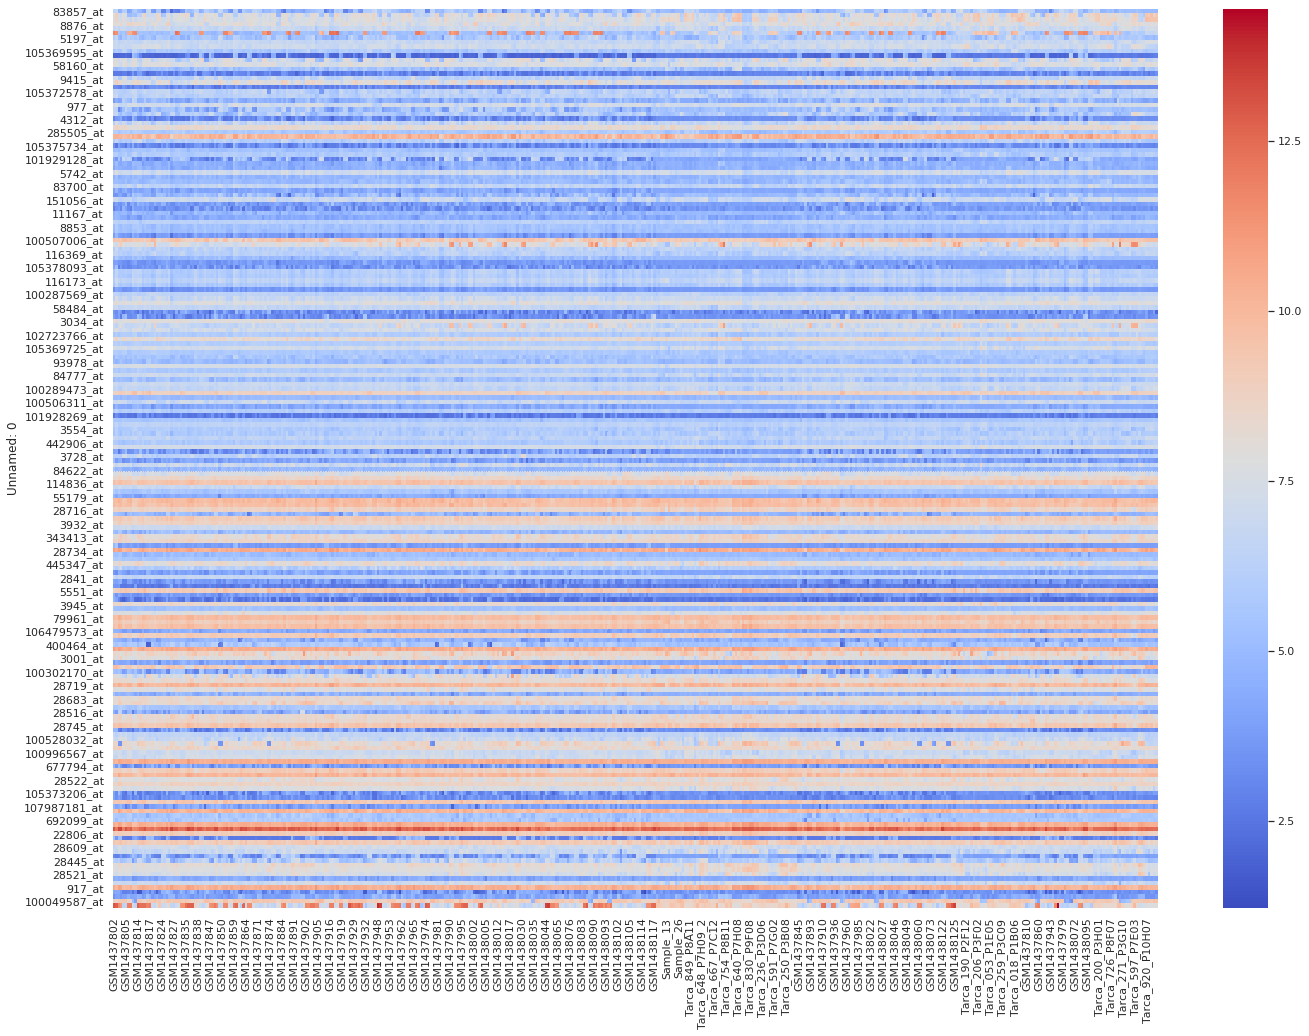

In [58]:
# when viewing this heatmap we see that the genes differentiate the data well
sns.heatmap(data=df_features, cmap='coolwarm')